In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define the positive and negative classses
positive_points=np.array([(-2,3),(0,1),(2,-1)])
negative_points=np.array([(-2,1),(0,-1),(2,-3)])

In [3]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

In [4]:
negative_points

array([[-2,  1],
       [ 0, -1],
       [ 2, -3]])

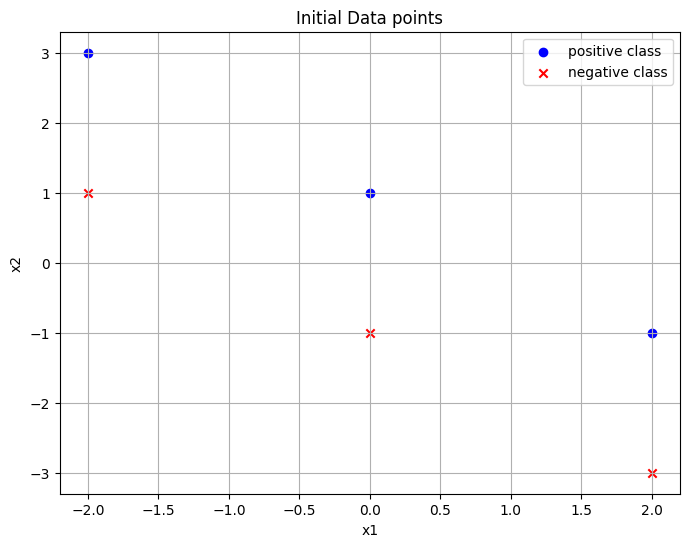

In [5]:
# plot intial data points
plt.figure(figsize=(8,6))
plt.scatter(positive_points[:,0], positive_points[:,1],color='blue',marker='o',label='positive class')
plt.scatter(negative_points[:,0], negative_points[:,1],color='red',marker='x',label='negative class')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data points')
plt.grid(True)
plt.show()

In [6]:
#Combine all points and labels
x=np.vstack((positive_points , negative_points))
y=np.array([1]*len(positive_points)+[-1]*len(negative_points))

In [7]:
x

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [8]:
y

array([ 1,  1,  1, -1, -1, -1])

In [9]:
#perceptron algorithm
def perceptron(X, y, steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0
    for t in range(steps):
        for i, xi in enumerate(X):
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]
                break
        # Plot after each iteration
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0

In [10]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='Positive class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative class')

    # Plot decision boundary
    x_values = np.linspace(-3, 3, 2)
    # Check for theta[1] to avoid division by zero in case of vertical line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label=f'Iteration {iteration}')
    else:
        # Plot vertical line
        x_val = -theta0 / theta[0]
        plt.axvline(x=x_val, label=f'Iteration {iteration}')

    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

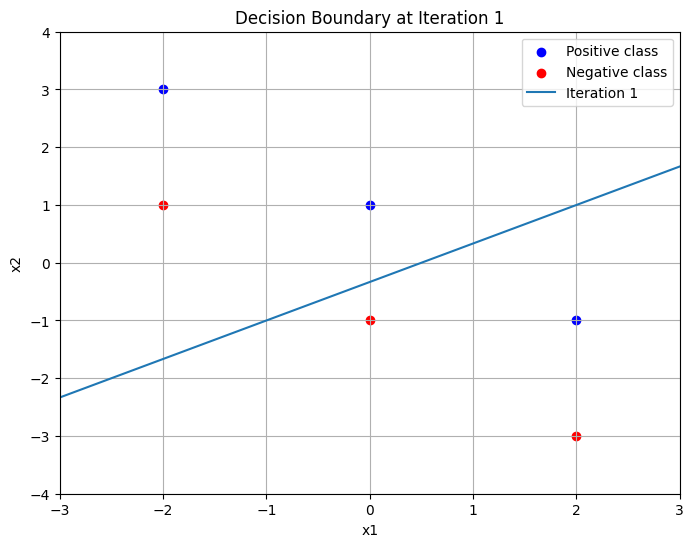

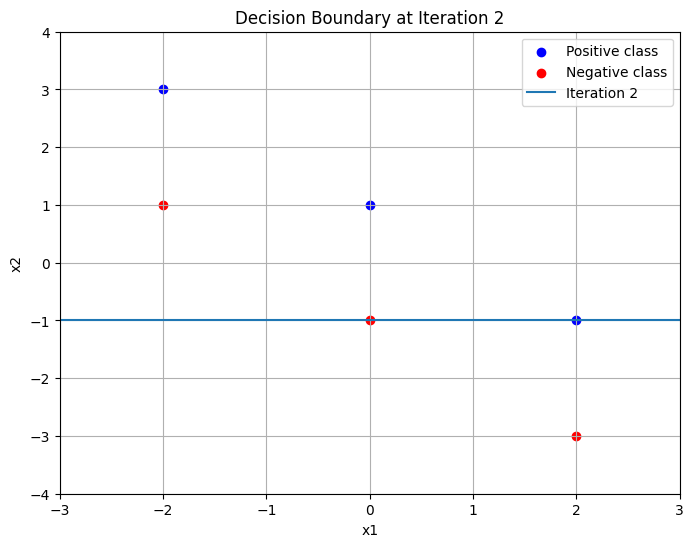

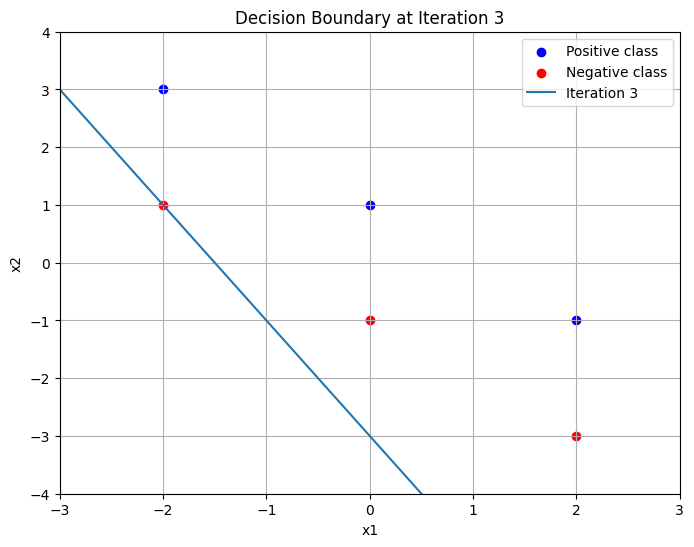

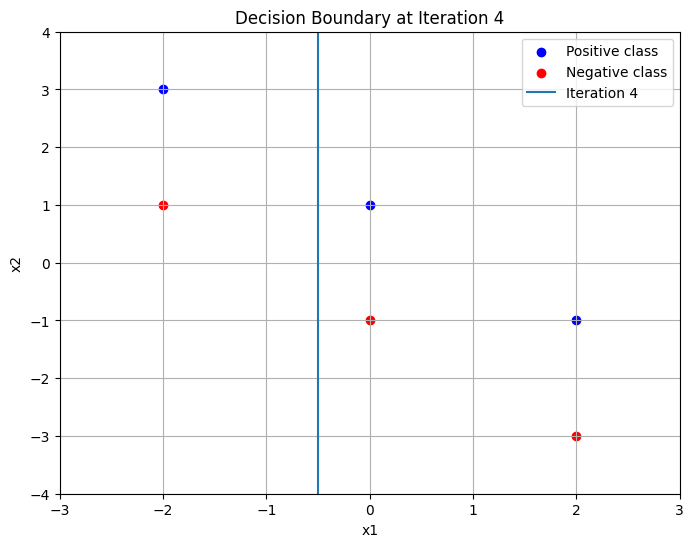

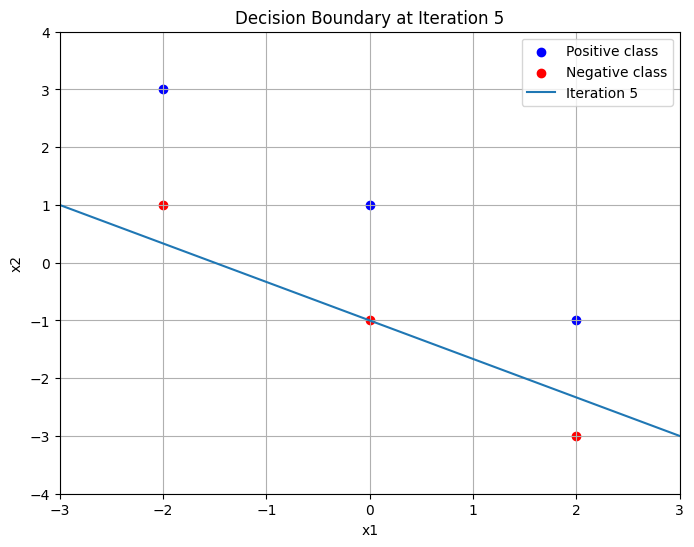

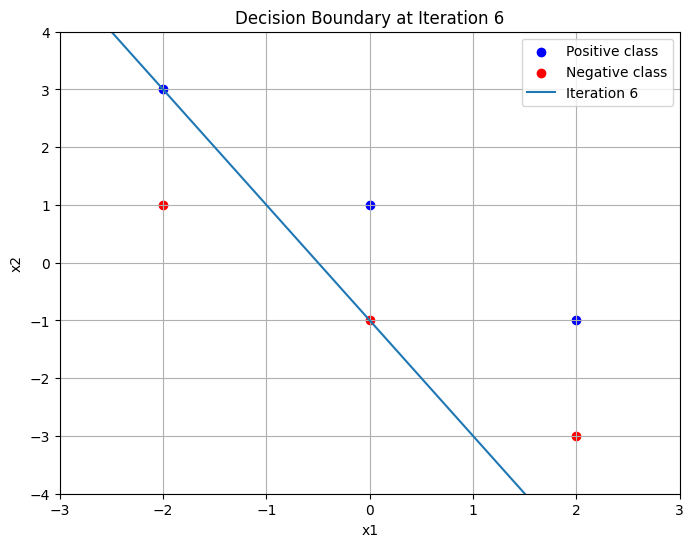

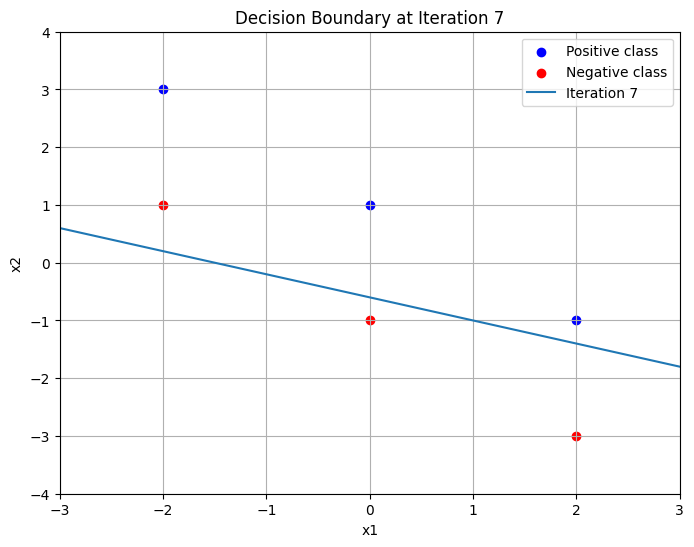

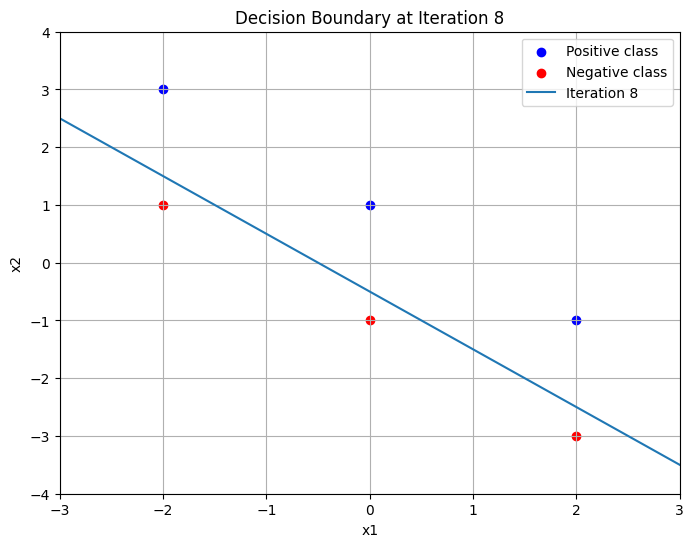

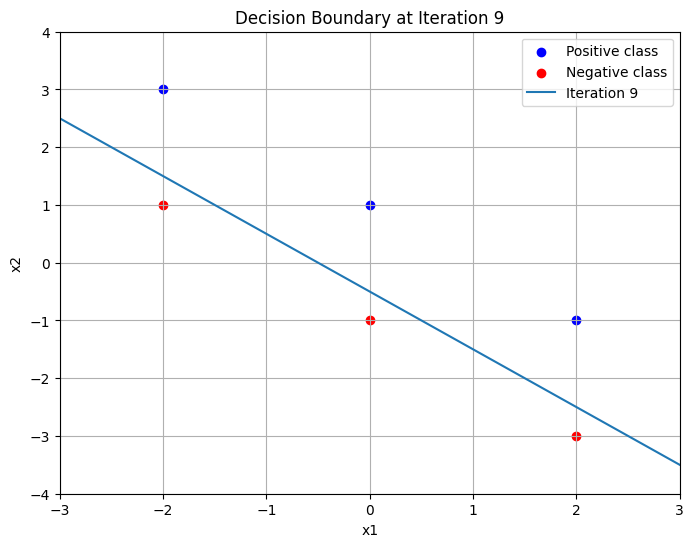

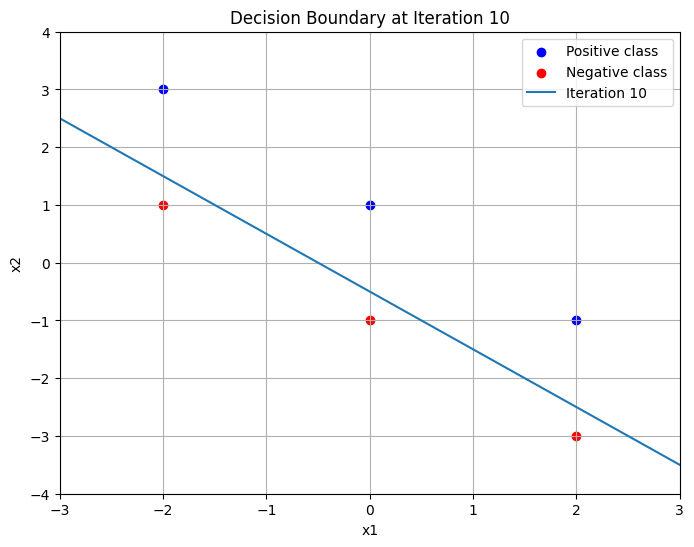

In [11]:
theta_final, theta0_final = perceptron(x, y, 10)